## Importing all necessary Libraries

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score  # Ensure this line is present at the top
from sklearn.model_selection import StratifiedKFold
from category_encoders import TargetEncoder

print("All necessary libraries are imported")

All necessary libraries are imported


## Data Cleaning

In [391]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1,2.0,No,0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7,3.0,No,1
2,2,Yuvraj,Male,33,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10,1.0,Yes,1
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9,4.0,Yes,0


In [392]:
#some tips, need to drop id, Name like columns. 
#depression columns is our target column. 

In [394]:
df_train.shape
#this dataset has 140700 rows, 20 columns.

(140700, 20)

In [395]:
df_train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [396]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  int64  
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [397]:
df_train.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                        int64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [398]:
df_train['Dietary Habits'].value_counts()
# print('\n')

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1                        1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [399]:
print(df_train['Profession'].value_counts())

Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64


In [400]:
df_train.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [401]:
# Index(['Gender', 'Age', 'City',
#        'Working Professional or Student', 'Profession', 'Academic Pressure',
#        'Work Pressure', 'Study Satisfaction', 'Job Satisfaction',
#        'Sleep Duration', 'Dietary Habits',
#        'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
#        'Financial Stress', 'Family History of Mental Illness', 'Depression'] )

In [402]:
df_train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
09-May                   1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [403]:
#Remove id, name, degree, (Dietary habits (also)).  
#need to convert column with variable entries as numerical one.

In [404]:
df_train.describe().loc[['mean','max','min']].T   
#T here indicates that result that we obtained 

,mean,max,min
id,70349.500000,140699.0,0.00
Age,40.388621,60.0,18.00
Academic Pressure,3.142273,5.0,1.00
Work Pressure,2.998998,5.0,1.00
CGPA,7.658636,10.0,5.03
Study Satisfaction,2.944940,5.0,1.00
Job Satisfaction,2.974404,5.0,1.00
Work/Study Hours,6.252679,12.0,0.00
Financial Stress,2.988983,5.0,1.00
Depression,0.181713,1.0,0.00


In [405]:
financial_stress = 3
academic_work_pressure = 3
cgpa = 7.65
job_study_satisfy = 3
# dietry_habit =  need to use column but first need to assign value to it. 

In [406]:
#labelencoder for labeling the variables that are present in the column (working professional or student)
#first fill the null values in the columns
df_train_new = df_train

In [407]:
df_train_new['Financial Stress'] = df_train['Financial Stress'].fillna(financial_stress)  

In [408]:
df_train_new.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1,2.0,No,0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7,3.0,No,1
2,2,Yuvraj,Male,33,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10,1.0,Yes,1
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9,4.0,Yes,0


In [409]:
columns_to_fill = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction']  # Specify the columns you want to fill
df_train_new[columns_to_fill] = df_train[columns_to_fill].fillna(academic_work_pressure)  

In [410]:
df_train_new['Dietary Habits'] = df_train_new['Dietary Habits'].apply(lambda x: x if x in ['Moderate', 'Healthy', 'Unhealthy'] else 'Moderate')

# Check the updated counts
print(df_train_new['Dietary Habits'].value_counts())

Dietary Habits
Moderate     49732
Unhealthy    46227
Healthy      44741
Name: count, dtype: int64


In [411]:
columns_fill = ['CGPA']  # Specify the columns you want to fill
df_train_new[columns_fill] = df_train[columns_fill].fillna(cgpa)  

In [412]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  int64  
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      140700 non-null  float64
 8   Work Pressure                          140700 non-null  float64
 9   CGPA                                   140700 non-null  float64
 10  Study Satisfaction                     140700 non-null  

In [413]:
# df_train_new = df_train_new.drop('Degree', axis=1)

In [414]:
prof_student = 'Student'
df_train_new['Profession'] = df_train['Profession'].fillna(prof_student)

In [415]:
degree = {
    "BCom": "B.Com", "B.Com": "B.Com", "B.Comm": "B.Com",
    "B.Tech": "B.Tech", "BTech": "B.Tech", "B.T": "B.Tech",
    "BSc": "B.Sc", "B.Sc": "B.Sc", "Bachelor of Science": "B.Sc",
    "BArch": "B.Arch", "B.Arch": "B.Arch",
    "BA": "B.A", "B.A": "B.A",
    "BBA": "BBA", "BB": "BBA",
    "BCA": "BCA",
    "BE": "BE",
    "BEd": "B.Ed", "B.Ed": "B.Ed",
    "BPharm": "B.Pharm", "B.Pharm": "B.Pharm",
    "BHM": "BHM",
    "LLB": "LLB", "LL B": "LLB", "LL BA": "LLB", "LL.Com": "LLB", "LLCom": "LLB",
    "MCom": "M.Com", "M.Com": "M.Com",
    "M.Tech": "M.Tech", "MTech": "M.Tech", "M.T": "M.Tech",
    "MSc": "M.Sc", "M.Sc": "M.Sc", "Master of Science": "M.Sc",
    "MBA": "MBA",
    "MCA": "MCA",
    "MD": "MD",
    "ME": "ME",
    "MEd": "M.Ed", "M.Ed": "M.Ed",
    "MArch": "M.Arch", "M.Arch": "M.Arch",
    "MPharm": "M.Pharm", "M.Pharm": "M.Pharm",
    "MA": "MA", "M.A": "MA",
    "MPA": "MPA",
    "LLM": "LLM",
    "PhD": "PhD",
    "MBBS": "MBBS",
    "CA": "CA",
    "Class 12": "Class 12", "12th": "Class 12",
    "Class 11": "Class 11", "11th": "Class 11"
}

df_train_new['Degree'] = df_train_new['Degree'].map(degree)
# test['Degree'] = test['Degree'].map(degree)

df_train_new['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'B.Sc', 'ME',
       'B.Arch', 'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', nan,
       'B.A', 'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'M.Sc', 'B.Tech',
       'LLM', 'MBBS', 'M.Pharm', 'MPA', 'Class 11', 'M.Arch'],
      dtype=object)

In [416]:
df_train_new.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,3.0,5.0,7.65,3.0,2.0,More than 8 hours,Healthy,BHM,No,1,2.0,No,0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,3.0,4.0,7.65,3.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7,3.0,No,1
2,2,Yuvraj,Male,33,Visakhapatnam,Student,Student,5.0,3.0,8.97,2.0,3.0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,3.0,5.0,7.65,3.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10,1.0,Yes,1
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,3.0,1.0,7.65,3.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9,4.0,Yes,0


In [417]:
df_train_new_final = df_train_new.drop(columns = ['Name', 'id'], axis=1)
df_train_new_final.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49,Ludhiana,Working Professional,Chef,3.0,5.0,7.65,3.0,2.0,More than 8 hours,Healthy,BHM,No,1,2.0,No,0
1,Male,26,Varanasi,Working Professional,Teacher,3.0,4.0,7.65,3.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7,3.0,No,1
2,Male,33,Visakhapatnam,Student,Student,5.0,3.0,8.97,2.0,3.0,5-6 hours,Healthy,B.Pharm,Yes,3,1.0,No,1
3,Male,22,Mumbai,Working Professional,Teacher,3.0,5.0,7.65,3.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10,1.0,Yes,1
4,Female,30,Kanpur,Working Professional,Business Analyst,3.0,1.0,7.65,3.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9,4.0,Yes,0


In [418]:
# print(df_train_new_final.isnull().sum())

In [419]:
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [420]:
target_encoder = TargetEncoder(cols=['Profession', 'Degree'])

In [421]:
df_train_new_final[['Profession', 'Degree']] = target_encoder.fit_transform(df_train_new_final[['Profession', 'Degree']], df_train_new_final['Depression'])

In [422]:
df_train_new_final['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

In [423]:
df_train_new_final = df_train_new_final.rename(columns = {
    "Have you ever had suicidal thoughts ?": "Suicidal Thoughts",
    "Family History of Mental Illness": "Family History",
})

In [424]:
df_train_new_final.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression
0,Female,49,Ludhiana,Working Professional,0.048567,3.0,5.0,7.65,3.0,2.0,More than 8 hours,Healthy,0.172590,No,1,2.0,No,0
1,Male,26,Varanasi,Working Professional,0.055649,3.0,4.0,7.65,3.0,3.0,Less than 5 hours,Unhealthy,0.150575,Yes,7,3.0,No,1
2,Male,33,Visakhapatnam,Student,0.534842,5.0,3.0,8.97,2.0,3.0,5-6 hours,Healthy,0.119324,Yes,3,1.0,No,1
3,Male,22,Mumbai,Working Professional,0.055649,3.0,5.0,7.65,3.0,1.0,Less than 5 hours,Moderate,0.134367,Yes,10,1.0,Yes,1
4,Female,30,Kanpur,Working Professional,0.056628,3.0,1.0,7.65,3.0,1.0,5-6 hours,Unhealthy,0.134367,Yes,9,4.0,Yes,0


In [425]:
#need to label the entries of Gender, city, working professional or student.
label_encoder = LabelEncoder()

In [426]:
df_train_new_final['Gender'] = label_encoder.fit_transform(df_train_new_final['Gender'])

In [427]:
df_train_new_final['Working Professional or Student'] = label_encoder.fit_transform(df_train_new_final['Working Professional or Student'])

In [428]:
df_train_new_final['City'] = label_encoder.fit_transform(df_train_new_final['City'])   
#it is better to remove this feature, as it has 98 unique entries.

In [429]:
dietary_habits = {
    'Unhealthy' : 1,
    'Moderate' : 2,
    'Healthy' : 3
}
df_train_new_final['Dietary Habits'] = df_train_new_final['Dietary Habits'].map(dietary_habits)
# df_train_final = df_train_final.dropna()

In [430]:
# df_train_new_final['Dietary Habits'] = label_encoder.fit_transform(df_train_new_final['Dietary Habits'])   

In [431]:
df_train_new_final['Suicidal Thoughts'] = label_encoder.fit_transform(df_train_new_final['Suicidal Thoughts'])  
df_train_new_final['Family History'] = label_encoder.fit_transform(df_train_new_final['Family History']) 

In [433]:
df_train_new_final.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression
0,0,49,50,1,0.048567,3.0,5.0,7.65,3.0,2.0,More than 8 hours,3,0.172590,0,1,2.0,0,0
1,1,26,93,1,0.055649,3.0,4.0,7.65,3.0,3.0,Less than 5 hours,1,0.150575,1,7,3.0,0,1
2,1,33,97,0,0.534842,5.0,3.0,8.97,2.0,3.0,5-6 hours,3,0.119324,1,3,1.0,0,1
3,1,22,64,1,0.055649,3.0,5.0,7.65,3.0,1.0,Less than 5 hours,2,0.134367,1,10,1.0,1,1
4,0,30,37,1,0.056628,3.0,1.0,7.65,3.0,1.0,5-6 hours,1,0.134367,1,9,4.0,1,0


In [434]:
df_train_new_final['Family History'].nunique()

2

In [435]:
df_train_new_final['Profession'].nunique()

43

In [436]:
# df_train_new_final['Sleep Duration'].value_counts()

In [437]:
df_train_model_final = df_train_new_final
df_train_model_final.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression
0,0,49,50,1,0.048567,3.0,5.0,7.65,3.0,2.0,More than 8 hours,3,0.172590,0,1,2.0,0,0
1,1,26,93,1,0.055649,3.0,4.0,7.65,3.0,3.0,Less than 5 hours,1,0.150575,1,7,3.0,0,1
2,1,33,97,0,0.534842,5.0,3.0,8.97,2.0,3.0,5-6 hours,3,0.119324,1,3,1.0,0,1
3,1,22,64,1,0.055649,3.0,5.0,7.65,3.0,1.0,Less than 5 hours,2,0.134367,1,10,1.0,1,1
4,0,30,37,1,0.056628,3.0,1.0,7.65,3.0,1.0,5-6 hours,1,0.134367,1,9,4.0,1,0


In [438]:
values_to_remove = [
    '4-6 hours', '2-3 hours', 'No', '1-6 hours', '6-8 hours', 'Sleep_Duration', 'Unhealthy', 
    '45', '8-9 hours', '9-11 hours', '10-11 hours', '10-6 hours', '9-5', '45-48 hours', 
    '3-6 hours', 'Work_Study_Hours', '49 hours', '4-5 hours', '3-4 hours','than 5 hours', 'Moderate', '55-66 hours', 
    '8 hours', '35-36 hours', '40-45 hours', '1-3 hours', '9-6 hours', '1-2 hours', '9-5 hours'
]

In [439]:
df_train_model_final = df_train_model_final[~df_train_model_final['Sleep Duration'].isin(values_to_remove)]

In [440]:
df_train_model_final['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
6-7 hours                8
Indore                   1
09-May                   1
Pune                     1
Name: count, dtype: int64

In [441]:
df_train_final = df_train_new_final.drop(columns = ['City'], axis=1)
df_train_final.head()

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Depression
0,0,49,1,0.048567,3.0,5.0,7.65,3.0,2.0,More than 8 hours,3,0.172590,0,1,2.0,0,0
1,1,26,1,0.055649,3.0,4.0,7.65,3.0,3.0,Less than 5 hours,1,0.150575,1,7,3.0,0,1
2,1,33,0,0.534842,5.0,3.0,8.97,2.0,3.0,5-6 hours,3,0.119324,1,3,1.0,0,1
3,1,22,1,0.055649,3.0,5.0,7.65,3.0,1.0,Less than 5 hours,2,0.134367,1,10,1.0,1,1
4,0,30,1,0.056628,3.0,1.0,7.65,3.0,1.0,5-6 hours,1,0.134367,1,9,4.0,1,0


In [442]:
# encoder = TargetEncoder(cols=['Profession'])
# df_train_final['Profession'] = encoder.fit_transform(df_train_final['Profession'], df_train_final['Depression'])
# # target = TargetEncoder()
# # df_train_final['Profession'] = target.fit_transform(df_train_final['Profession'])
# df_train_final.head()

In [443]:
label_encoding_dict = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '6-7 hours': 3,
    '7-8 hours': 4,
    'More than 8 hours': 5
}     #creating dicitonary for storing the strings as numeric value.

df_train_final['Sleep Duration Encoded'] = df_train_final['Sleep Duration'].map(label_encoding_dict)
df_train_final = df_train_final.dropna()

In [444]:
#now converted all the entries in the dataset to numeric value. 
#need to separate the x and y entries.
x = df_train_final.drop(columns = ['Depression', 'Sleep Duration'], axis=1)
y = df_train_final['Depression']

In [445]:
x.tail()

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Sleep Duration Encoded
140695,0,18,1,0.534842,3.0,5.0,7.65,3.0,4.0,1,0.512526,0,2,4.0,1,2.0
140696,0,41,1,0.018684,3.0,5.0,7.65,3.0,4.0,2,0.214011,1,6,5.0,1,4.0
140697,0,24,1,0.050607,3.0,3.0,7.65,3.0,1.0,2,0.155676,0,4,4.0,0,5.0
140698,0,49,1,0.064073,3.0,5.0,7.65,3.0,2.0,2,0.071861,1,10,1.0,0,2.0
140699,1,27,0,0.534842,4.0,3.0,9.24,1.0,3.0,3,0.203868,1,2,3.0,1,1.0


In [446]:
#need to standardize the data in order to avoid the bias that may occur through entries of the column.
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
# """should not standardize the columns that are label encoded. Reason : ordinality will be removed. (ex 5-6 -> 1 are given but when we standardize the column
# then we will not be able to map value that is produced with label encoded"""

In [447]:
# x['Age'] = scaler.fit_transform(x)
x['Age'] = scaler.fit_transform(x)

In [448]:
x['Dietary Habits'].value_counts()

Dietary Habits
2    49701
1    46205
3    44723
Name: count, dtype: int64

In [449]:
# x= x.drop('CGPA', axis=1)
# x.head()

In [450]:
numeric_df = x.select_dtypes(include='number')

In [451]:
correlation_matrix = numeric_df.corr()

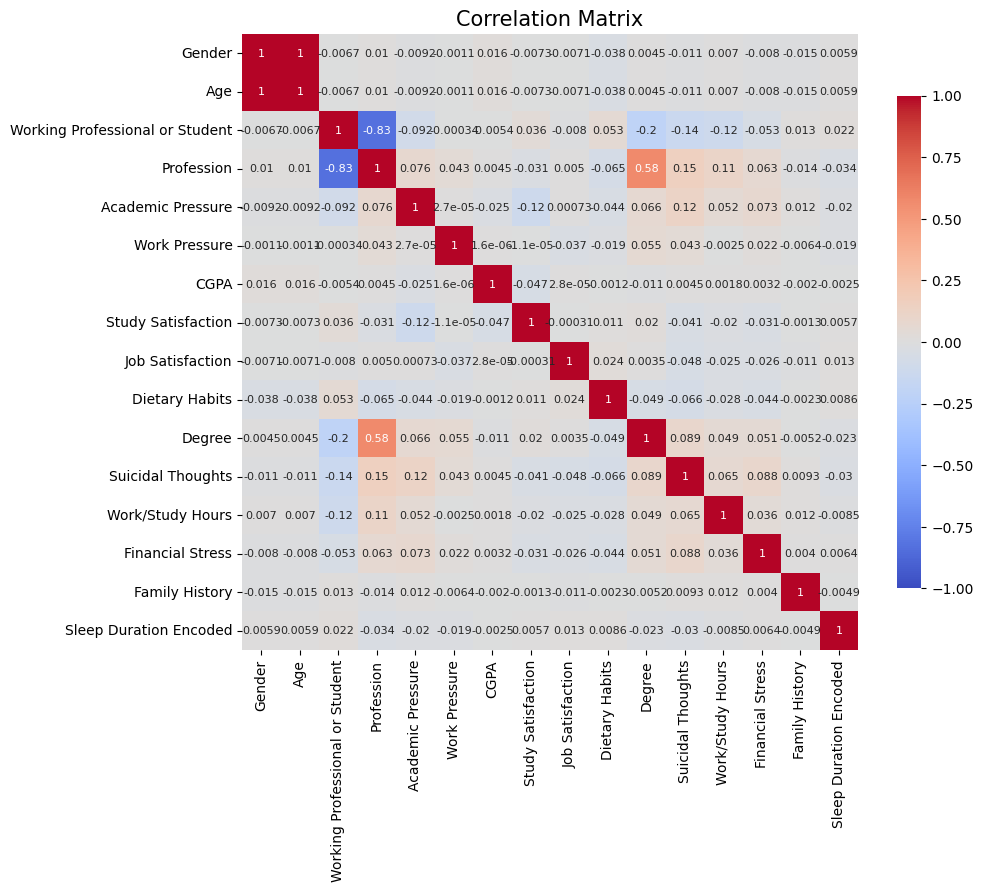

In [452]:
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title("Correlation Matrix")
# plt.show()

plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    vmin=-1, 
    vmax=1, 
    square=True, 
    cbar_kws={"shrink": .8}, 
    annot_kws={"size": 8}
)

# Set the title
plt.title("Correlation Matrix", fontsize=15)

# Display the plot
plt.show()

In [453]:
# print(y.isnull().sum())
# print("NaNs in x_train:", x_train.isnull().sum().sum())
# # print("NaNs in y_train:", y_train.isnull().sum())

In [454]:
y.shape

(140629,)

In [455]:
x.to_csv('final_eda_train.csv', index=True)

In [456]:
x_train_ds = x

In [457]:
train_df = x_train_ds

In [458]:
y = df_train_final['Depression']

In [459]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Depression, dtype: int64

In [460]:
print(train_df[['Profession']].isnull().sum())

Profession    0
dtype: int64


## Model Training

In [461]:
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.2, random_state = 42)

In [462]:
x_train.shape

(112503, 16)

In [463]:
x_train.head()

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Sleep Duration Encoded
43697,0,-1.10683,1,0.018684,3.0,2.0,7.65,3.0,4.0,1,0.128709,0,5,2.0,1,1.0
39108,0,-1.10683,1,0.018684,3.0,2.0,7.65,3.0,4.0,3,0.144549,0,0,3.0,0,5.0
2516,0,-1.10683,1,0.050607,3.0,1.0,7.65,3.0,1.0,1,0.155676,0,6,2.0,1,2.0
116069,0,-1.10683,1,0.052842,3.0,5.0,7.65,3.0,5.0,1,0.120012,1,0,5.0,1,1.0
61801,0,-1.10683,1,0.077824,3.0,2.0,7.65,3.0,2.0,2,0.155467,1,4,4.0,0,4.0


In [464]:
y_train.shape

(112503,)

In [465]:
y_test.shape

(28126,)

In [466]:
training_model = LogisticRegression()

In [467]:
# y_train = y_train.to_numpy()  # This will make y_train 1D if it's 2D
# y_train_series = pd.Series(y_train)

In [468]:
training_model.fit(x_train, y_train)

LogisticRegression()

In [469]:
y_pred = training_model.predict(x_test)

In [470]:
y_pred.shape 

(28126,)

In [471]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9227049704899382


In [472]:
svm_model = SVC()

In [473]:
svm_model.fit(x_train, y_train)

SVC()

In [474]:
svm_model.score(x_test,y_test)

0.9215672331650431

In [475]:
#need to do the same with linear kernel.

In [476]:
svm_model_linear = SVC(kernel = 'linear')

In [477]:
svm_model_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [478]:
svm_model_linear.score(x_test,y_test)

0.921673896039252

## Testing ML Model

In [479]:
df_test = pd.read_csv('test.csv')

In [480]:
df_test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9,3,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6,4,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12,4,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10,4,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3,4,No


In [481]:
df_test.shape

(93800, 19)

In [482]:
df_test.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,93800.000000,93800.000000,18767.000000,75022.000000,18766.000000,18767.000000,75026.00000,93800.000000,93800.000000
mean,187599.500000,40.321685,3.158576,3.011797,7.674016,2.939522,2.96092,6.247335,2.978763
std,27077.871962,12.393480,1.386666,1.403563,1.465056,1.374242,1.41071,3.858191,1.414604
min,140700.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.00000,0.000000,1.000000
25%,164149.750000,29.000000,2.000000,2.000000,6.330000,2.000000,2.00000,3.000000,2.000000
50%,187599.500000,42.000000,3.000000,3.000000,7.800000,3.000000,3.00000,6.000000,3.000000
75%,211049.250000,51.000000,4.000000,4.000000,8.940000,4.000000,4.00000,10.000000,4.000000
max,234499.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.00000,12.000000,5.000000


In [483]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [484]:
df_test['Dietary Habits'].value_counts()

Dietary Habits
Moderate        33018
Unhealthy       30786
Healthy         29966
No                  6
More Healthy        2
Academic            1
Naina               1
1                   1
Raghav              1
Vivaan              1
5 Unhealthy         1
Soham               1
Educational         1
MCA                 1
5 Healthy           1
Resistant           1
Mealy               1
Less Healthy        1
Male                1
Prachi              1
Indoor              1
Kolkata             1
Name: count, dtype: int64

In [485]:
df_test.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')

In [500]:
value_to_remove = [
    'No', 'More Healthy','Academic', 'Raghav', 'Educational', 'Soham', 'Resistant', 'Mealy', 'Less Healthy', 'Prachi', 'Male',
    'MCA', 'Kolkata', 'Indoor', 'Vivaan', 'Naina', '5 Healthy', '5 Unhealthy', '1.0'                    
]

In [501]:
df_test_new = df_test.drop(columns = ['id', 'Name'], axis=1)

In [502]:
df_test_new.describe().loc[['mean','max','min']].T   

,mean,max,min
Age,40.321685,60.0,18.00
Academic Pressure,3.158576,5.0,1.00
Work Pressure,3.011797,5.0,1.00
CGPA,7.674016,10.0,5.03
Study Satisfaction,2.939522,5.0,1.00
Job Satisfaction,2.960920,5.0,1.00
Work/Study Hours,6.247335,12.0,0.00
Financial Stress,2.978763,5.0,1.00


In [503]:
df_test_new.isnull().sum()

Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [504]:
academic_work_pressure = 3
study_job_satisfaction = 3
cgpa = 7.67

In [505]:
df_test_new['Academic Pressure'] = df_test_new['Academic Pressure'].fillna(academic_work_pressure)
df_test_new['Work Pressure'] = df_test_new['Work Pressure'].fillna(academic_work_pressure)

In [506]:
df_test_new['Study Satisfaction'] = df_test_new['Study Satisfaction'].fillna(study_job_satisfaction)
df_test_new['Job Satisfaction'] = df_test_new['Job Satisfaction'].fillna(study_job_satisfaction)

In [507]:
df_test_new['Dietary Habits'].mode()

0    Moderate
Name: Dietary Habits, dtype: object

In [508]:
df_test_new['Dietary Habits'] = df_test_new['Dietary Habits'].apply(lambda x: x if x in ['Moderate', 'Healthy', 'Unhealthy'] else 'Moderate')

In [509]:
df_test_new['CGPA'] = df_test_new['CGPA'].fillna(cgpa)

In [510]:
df_test_new.isnull().sum()

Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                            0
Work Pressure                                0
CGPA                                         0
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               0
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [511]:
df_test_final = df_test_new.rename(columns = {
    'Have you ever had suicidal thoughts ?' : 'Suicidal Thoughts', 
    'Family History of Mental Illness' : 'Family History', 
})

In [512]:
prof_student = 'Student'
df_test_final['Profession'] = df_test_final['Profession'].fillna(prof_student)

In [513]:
df_test_final.shape

(93800, 17)

In [514]:
df_test_final[['Profession', 'Degree']] = target_encoder.transform(df_test_final[['Profession', 'Degree']])

In [515]:
label_encoder = LabelEncoder()

In [516]:
df_test_final['Gender'] = label_encoder.fit_transform(df_test_final['Gender'])

In [517]:
df_test_final['Working Professional or Student'] = label_encoder.fit_transform(df_test_final['Working Professional or Student'])

In [518]:
df_test_final['Family History'] = label_encoder.fit_transform(df_test_final['Family History'])

In [519]:
df_test_final['Suicidal Thoughts'] = label_encoder.fit_transform(df_test_final['Suicidal Thoughts'])

In [520]:
df_test_final['City'] = label_encoder.fit_transform(df_test_final['City'])

In [521]:
df_test_final.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History
0,1,53.0,67,1,0.108645,3.0,2.0,7.67,3.0,5.0,Less than 5 hours,Moderate,0.150575,0,9,3,1
1,0,58.0,25,1,0.074684,3.0,2.0,7.67,3.0,4.0,Less than 5 hours,Moderate,0.128709,0,6,4,0
2,1,53.0,21,1,0.055649,3.0,4.0,7.67,3.0,1.0,7-8 hours,Moderate,0.157594,1,12,4,0
3,0,23.0,47,0,0.534842,5.0,3.0,6.84,1.0,3.0,More than 8 hours,Moderate,0.181713,1,10,4,0
4,1,47.0,22,1,0.055649,3.0,5.0,7.67,3.0,5.0,7-8 hours,Moderate,0.203868,1,3,4,0


In [522]:
df_test_final['Dietary Habits'].value_counts()

Dietary Habits
Moderate     33048
Unhealthy    30786
Healthy      29966
Name: count, dtype: int64

In [523]:
df_test_model = df_test_final

In [524]:
# df_test_model = df_test_model[~df_test_model['Dietary Habits'].isin(value_to_remove)]
df_test_final['Dietary Habits'] = df_test_final['Dietary Habits'].apply(lambda x: x if x in ['Moderate', 'Healthy', 'Unhealthy'] else 'Moderate')
df_test_final.shape

(93800, 17)

In [525]:
df_test_final['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours                      25661
7-8 hours                              24491
More than 8 hours                      22190
5-6 hours                              21404
6-7 hours                                  7
8-9 hours                                  6
4-5 hours                                  6
2-3 hours                                  4
3-4 hours                                  3
9-5 hours                                  2
1-6 hours                                  2
09-May                                     2
Meerut                                     2
4-6 hours                                  2
1-2 hours                                  2
10-6 hours                                 1
9-10 hours                                 1
9-11 hours                                 1
50-75 hours                                1
6 hours                                    1
1-3 hours                                  1
8-89 hours                              

In [526]:
df_test_final['Sleep Duration'] = df_test_final['Sleep Duration'].apply(lambda x: x if x in ['Less than 5 hours', '5-6 hours', '6-7 hours', '7-8 hours','More than 8 hours'] else 'Less than 5 hours')
df_test_final.shape

(93800, 17)

In [527]:
values_to_remove = [
    'Meerut', '0', '60-65 hours', 'Vivan', '8-89 hours', 'Have_you_ever_had_suicidal_thoughts', '20-21 hours', '6 hours', '50-75 hours', '9-10 hours'
]

In [528]:
# df_test_model = df_test_model[~df_test_model['Sleep Duration'].isin(values_to_remove)]
#this step removes the entries that are present in the value_to_remove which has corresponding dietary habits values.

In [531]:
# encoder = TargetEncoder(cols=['Profession'])
# df_test_final['Profession'] = encoder.fit_transform(df_test_final['Profession'])
# # target = TargetEncoder()
# # df_train_final['Profession'] = target.fit_transform(df_train_final['Profession'])
# df_test_final.head()

In [532]:
sleep_duration = {
    'Less than 5 hours' : 1,
    '5-6 hours' : 2,
    '6-7 hours' : 3,
    '7-8 hours' : 4,
    'More than 8 hours' : 5
}

In [533]:
df_test_final.shape

(93800, 17)

In [534]:
# df_test_final = df_test_final.drop(columns=['Profession', 'City'], axis=1)

In [535]:
df_test_final['Sleep Duration Encoded'] = df_test_final['Sleep Duration'].map(sleep_duration)

In [536]:
dietary_habits = {
    'Unhealthy' : 1,
    'Moderate' : 2,
    'Healthy' : 3
}

In [537]:
df_test_final['Dietary Habits'] = df_test_final['Dietary Habits'].map(dietary_habits)
df_test_final.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Sleep Duration Encoded
0,1,53.0,67,1,0.108645,3.0,2.0,7.67,3.0,5.0,Less than 5 hours,2,0.150575,0,9,3,1,1
1,0,58.0,25,1,0.074684,3.0,2.0,7.67,3.0,4.0,Less than 5 hours,2,0.128709,0,6,4,0,1
2,1,53.0,21,1,0.055649,3.0,4.0,7.67,3.0,1.0,7-8 hours,2,0.157594,1,12,4,0,4
3,0,23.0,47,0,0.534842,5.0,3.0,6.84,1.0,3.0,More than 8 hours,2,0.181713,1,10,4,0,5
4,1,47.0,22,1,0.055649,3.0,5.0,7.67,3.0,5.0,7-8 hours,2,0.203868,1,3,4,0,4


In [538]:
df_test_final['Age'].isnull().sum()

0

In [543]:
df_test_model = df_test_final.drop('Sleep Duration', axis=1)
df_test_model.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Sleep Duration Encoded
0,1,53.0,67,1,0.108645,3.0,2.0,7.67,3.0,5.0,2,0.150575,0,9,3,1,1
1,0,58.0,25,1,0.074684,3.0,2.0,7.67,3.0,4.0,2,0.128709,0,6,4,0,1
2,1,53.0,21,1,0.055649,3.0,4.0,7.67,3.0,1.0,2,0.157594,1,12,4,0,4
3,0,23.0,47,0,0.534842,5.0,3.0,6.84,1.0,3.0,2,0.181713,1,10,4,0,5
4,1,47.0,22,1,0.055649,3.0,5.0,7.67,3.0,5.0,2,0.203868,1,3,4,0,4


In [544]:
scaler = StandardScaler()

In [545]:
# df_test_model = df_test_model.drop('Profession', axis=1)

In [546]:
df_test_model['Age'] = scaler.fit_transform(df_test_model)

In [547]:
df_test_model.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family History,Sleep Duration Encoded
0,1,0.910942,67,1,0.108645,3.0,2.0,7.67,3.0,5.0,2,0.150575,0,9,3,1,1
1,0,-1.097765,25,1,0.074684,3.0,2.0,7.67,3.0,4.0,2,0.128709,0,6,4,0,1
2,1,0.910942,21,1,0.055649,3.0,4.0,7.67,3.0,1.0,2,0.157594,1,12,4,0,4
3,0,-1.097765,47,0,0.534842,5.0,3.0,6.84,1.0,3.0,2,0.181713,1,10,4,0,5
4,1,0.910942,22,1,0.055649,3.0,5.0,7.67,3.0,5.0,2,0.203868,1,3,4,0,4


In [548]:
df_test_model = df_test_model[train_df.columns]

In [549]:
x = df_test_model

In [550]:
y_pred_log_reg = training_model.predict(df_test_model)

In [551]:
y_pred = pd.DataFrame(y_pred_log_reg, columns=['Depression'])

In [552]:
y_pred.to_csv('test_result_svm_predict_min_max.csv', index=True)
#91.204% accuracy, need to increase more 94%. Need to focus on EDA process using data visualization and other mehtods needs to be learnt. 

In [553]:
import lightgbm as lgb
import xgboost as xgb

In [554]:
lgb_clss = lgb.LGBMClassifier(learning_rate=0.01,n_estimators=500,num_leaves=100,objective='binary', metrics='auc',random_state=50,n_jobs=-1)
lgb_clss.fit(x_train, y_train)
lgb_clss.score(x_test, y_test)
preds2 = lgb_clss.predict(x_test)
print('Acc Score: ',accuracy_score(y_test, preds2))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20406, number of negative: 92097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 323
[LightGBM] [Info] Number of data points in the train set: 112503, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181382 -> initscore=-1.507013
[LightGBM] [Info] Start training from score -1.507013
Acc Score:  0.9229894048211619


In [556]:
y_pred_lgb = lgb_clss.predict(df_test_model)
y_pred_csv = pd.DataFrame(y_pred_lgb, columns=['Depression'])
y_pred_csv.to_csv('test_pred_lgb_encoded.csv', index=True)

In [557]:
from sklearn.metrics import f1_score, roc_auc_score

In [558]:
from xgboost import XGBClassifier

In [559]:
model_xgb = XGBClassifier(colsample_bytree = 1,
    n_estimators=3750,
    learning_rate= 0.01,
    max_depth=2,
    reg_alpha=0,
    reg_lambda=0,
    gamma=0.5,
    eval_metric='auc',
    random_state=607)

In [560]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.5,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3750, n_jobs=None,
              num_parallel_tree=None, random_state=607, ...)

In [561]:
y_pred_xgb_train = model_xgb.predict(x_test)

In [562]:
print(accuracy_score(y_pred_xgb_train, y_test))

0.9237004906492213


In [563]:
# (acc_score)
y_pred_xgb_test = model_xgb.predict(df_test_model)

In [564]:
y_pred_xgb = pd.DataFrame(y_pred_xgb_test, columns=['Depression'])

In [565]:
y_pred.to_csv('y_pred_xgb_encoded.csv', index=True)

In [566]:
xgb_imp = XGBClassifier(colsample_bytree = 0.288807006380292,
    n_estimators=3000,
    learning_rate= 0.06,
    max_depth=3,
    reg_alpha=0.3037629135788351,
    reg_lambda=0.7430403624711,
    gamma=0.08745985967670639,
    eval_metric='auc',
    random_state=607)

In [567]:
xgb_imp.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.288807006380292, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.08745985967670639,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3000, n_jobs=None,
              num_parallel_tree=None, random_state=607, ...)

In [568]:
y_xgb_imp_pred = xgb_imp.predict(x_test)

In [569]:
print(accuracy_score(y_test, y_xgb_imp_pred))

0.9240204792718482
